<a href="https://colab.research.google.com/github/Karan8989-ux/NLP-DL/blob/main/People_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="87CyvcE2GpaNNPZkh7QF")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(10)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-10 in yolov11:: 100%|██████████| 34814/34814 [00:13<00:00, 2643.53it/s]


In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:00


In [ ]:
import os

# Assuming the dataset was downloaded to a directory named after the project and version
dataset_dir = "People-Detection-10"
data_config_path = os.path.join(dataset_dir, "data.yaml")

print(f"Data configuration file path: {data_config_path}")

Data configuration file path: People-Detection-10/data.yaml


In [ ]:
 from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolov8n.pt')  # You can choose a different YOLO model like yolov8s.pt, yolov8m.pt, etc.

# Train the model with resumable training enabled
# The 'resume=True' argument will automatically resume from the last saved checkpoint
# if training is interrupted.
results = model.train(data=data_config_path, epochs=100, imgsz=640)

print("Training finished.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=People-Detection-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.

After training, it's essential to evaluate your model to see how well it performs on unseen data.

In [ ]:
# Evaluate the model on the validation set
metrics = model.val()

# Print the evaluation metrics
print(metrics)

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1014.0±335.5 MB/s, size: 37.3 KB)
val: Scanning /content/People-Detection-10/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1431/1431 2.6Mit/s 0.0s
val: /content/People-Detection-10/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 90/90 6.0it/s 15.0s
                   all       1431      10660      0.819   

After evaluating the model, you can use it to perform inference on new data. This means using the trained model to make predictions on images or videos it hasn't seen before.


image 1/1 /content/img.png: 352x640 29 persons, 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


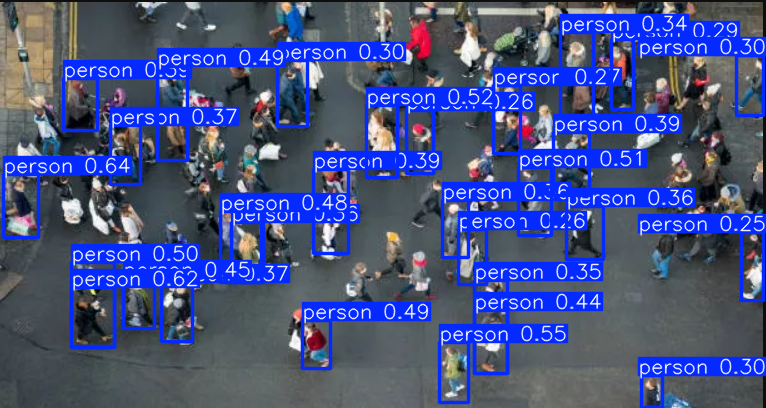

Number of people detected: 29


In [ ]:
# Perform inference on an image
# Replace 'path/to/your/image.jpg' with the actual path to your image file
results = model('/content/img.png')

# The 'results' object contains the predictions, which you can then process or visualize.
# For example, to view the predicted image:
results[0].show()

# Count the number of people detected
person_count = 0
for result in results:
    # Iterate through each detected box in the result
    for box in result.boxes:
        # Assuming 'person' is the class name for people in your model
        # You might need to adjust this based on your dataset's class names
        if model.names[int(box.cls)] == 'person':
            person_count += 1

print(f"Number of people detected: {person_count}")